In [32]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request

In [33]:
os.chdir("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data")
os.getcwd()

'C:\\Users\\Roberto Benard Orci\\Documents\\UNI\\Verano Investigacion\\Simulation data'

In [34]:
Halos = np.load("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/halos.npy")

In [35]:
MostMassiveHalo = Halos[:,0].max()
IDMostMassiveHalo = 0

for x in Halos[:,0]:
    if x == MostMassiveHalo:
        break
    IDMostMassiveHalo = IDMostMassiveHalo+1

In [36]:
x0 = Halos[IDMostMassiveHalo,1].item()
y0 = Halos[IDMostMassiveHalo,2].item()

x0SupLim = x0+5
x0InfLim = x0-5
y0SupLim = y0+5
y0InfLim = y0-5

In [37]:
DarkMatterParticles = np.load("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/dm_cat_ds_100.npy")

In [38]:
#Box = []
#Cylinder = []

#for x, y, z in zip(DarkMatterParticles[:,1], DarkMatterParticles[:,2], DarkMatterParticles[:,6]) :
#    if (x <= x0SupLim) & (x >= x0InfLim) & (y <= y0SupLim) & (y >= y0InfLim) :
#        Box.append([x, y, z])

#Box = np.array(Box)

#for x, y, z in zip(Box[:,0], Box[:,1], Box[:,2]) :
#    if ((x-x0)**2)+((y-y0)**2)<=25 :
#        Cylinder.append([x, y, z])

#This process takes too long, so we use the one on the cell below.

In [58]:
Box = []
Cylinder = []

for x, y, z in zip(DarkMatterParticles[:,1], DarkMatterParticles[:,2], DarkMatterParticles[:,6]) :
    if (x <= x0SupLim) & (x >= x0InfLim) & (y <= y0SupLim) & (y >= y0InfLim) :
        Box.append([x, y, z])
        
Box = np.array(Box)

Delta = np.zeros((np.size(Box[:,0]),2))

Delta[:,0]= Box[:,0]-x0
Delta[:,1]= Box[:,1]-y0

DistanceSquared = Delta[:,0]**2 + Delta[:,1]**2

# np.where(DistanceSquared<=25)

for x, y, z, w in zip(Box[:,0], Box[:,1], Box[:,2], DistanceSquared) :
    if w<=25 :
        Cylinder.append([x, y, z])
        
#
#
#
#There is no need to put the coordinates on the array Cylinder, we only need Vz (a.k.a. variable z)
#
#
#

In [40]:
MostMassiveHaloVelocity = Halos[IDMostMassiveHalo,6]

In [41]:
Cylinder = np.array(Cylinder)

In [42]:
FinalVelocities = []

for x in Cylinder[:,2] :
    VelocityOfDMParticlesRelativeToTheMMH = x - MostMassiveHaloVelocity
    FinalVelocities.append(VelocityOfDMParticlesRelativeToTheMMH)

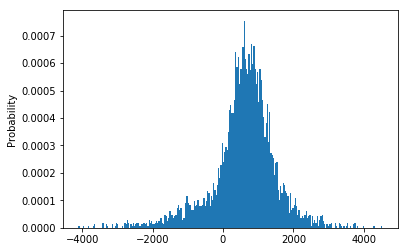

In [52]:
plt.hist(FinalVelocities, density=True, bins=250)
plt.ylabel('Probability');

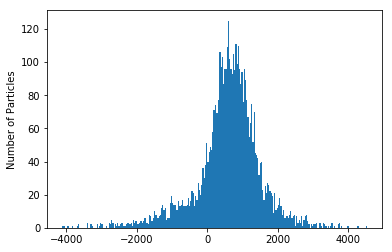

In [44]:
plt.hist(FinalVelocities, bins=250)
plt.ylabel('Number of Particles');

In [45]:
DarkMatterParticlesMediumDS = np.load("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/dm_cat_ds_1000.npy")
DarkMatterParticlesHighDS = np.load("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/dm_cat_ds_10000.npy")

In [53]:
BoxMDS = []
CylinderMDS = []

for x, y, z in zip(DarkMatterParticlesMediumDS[:,1], DarkMatterParticlesMediumDS[:,2], DarkMatterParticlesMediumDS[:,6]) :
    if (x <= x0SupLim) & (x >= x0InfLim) & (y <= y0SupLim) & (y >= y0InfLim) :
        BoxMDS.append([x, y, z])
        
BoxMDS = np.array(BoxMDS)

DeltaMDS = np.zeros((np.size(BoxMDS[:,0]),2))

DeltaMDS[:,0]= BoxMDS[:,0]-x0
DeltaMDS[:,1]= BoxMDS[:,1]-y0

DistanceSquaredMDS = DeltaMDS[:,0]**2 + DeltaMDS[:,1]**2

for x, y, z, w in zip(BoxMDS[:,0], BoxMDS[:,1], BoxMDS[:,2], DistanceSquaredMDS) :
    if w<=25 :
        CylinderMDS.append([x, y, z])

#########################

BoxHDS = []
CylinderHDS = []

for x, y, z in zip(DarkMatterParticlesHighDS[:,1], DarkMatterParticlesHighDS[:,2], DarkMatterParticlesHighDS[:,6]) :
    if (x <= x0SupLim) & (x >= x0InfLim) & (y <= y0SupLim) & (y >= y0InfLim) :
        BoxHDS.append([x, y, z])
        
BoxHDS = np.array(BoxHDS)

DeltaHDS = np.zeros((np.size(BoxHDS[:,0]),2))

DeltaHDS[:,0]= BoxHDS[:,0]-x0
DeltaHDS[:,1]= BoxHDS[:,1]-y0

DistanceSquaredHDS = DeltaHDS[:,0]**2 + DeltaHDS[:,1]**2

for x, y, z, w in zip(BoxHDS[:,0], BoxHDS[:,1], BoxHDS[:,2], DistanceSquaredHDS) :
    if w<=25 :
        CylinderHDS.append([x, y, z])

In [54]:
CylinderMDS = np.array(CylinderMDS)
CylinderHDS = np.array(CylinderHDS)

In [55]:
FinalVelocitiesMDS = []

for x in CylinderMDS[:,2] :
    VelocityOfDMParticlesRelativeToTheMMH = x - MostMassiveHaloVelocity
    FinalVelocitiesMDS.append(VelocityOfDMParticlesRelativeToTheMMH)

FinalVelocitiesHDS = []

for x in CylinderHDS[:,2] :
    VelocityOfDMParticlesRelativeToTheMMH = x - MostMassiveHaloVelocity
    FinalVelocitiesHDS.append(VelocityOfDMParticlesRelativeToTheMMH)

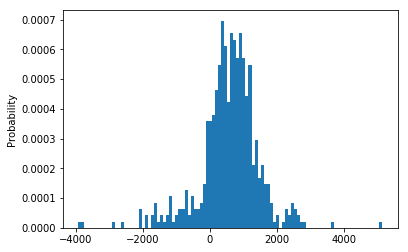

In [56]:
plt.hist(FinalVelocitiesMDS, density=True, bins=100)
plt.ylabel('Probability');

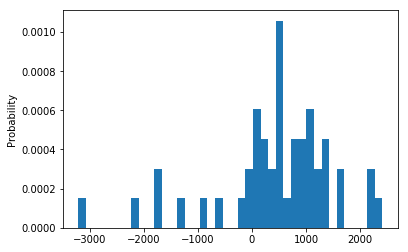

In [57]:
plt.hist(FinalVelocitiesHDS, density=True, bins=40)
plt.ylabel('Probability');

In [51]:
#Las formas ("shapes") de los numpy arrays van entre parentesis 
Delta = np.zeros((np.size(CylinderHDS[:,0]),3))